In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import (
    train_test_split, 
    GridSearchCV, 
    cross_val_score, 
    learning_curve,
    StratifiedKFold
)
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

In [2]:
import sys

#carga de datos
sys.path.append('D:\Proyectos Personales ML\Fraud detection\data\processed\data_processed.csv')


In [3]:
DATA_PATH = r'D:\Proyectos Personales ML\Fraud detection\data\processed\data_processed.csv'
df = pd.read_csv(DATA_PATH)
df.head(5)

,V14,V10,V4,V12,V1,Class
0,-1.054631,-0.597739,0.716564,-0.216435,1.314539,0
1,0.573006,0.170547,0.694584,0.468322,-0.798672,0
2,-0.338340,2.051312,-1.308725,-0.594037,-0.391128,0
3,-0.436671,-1.238598,-0.029567,-0.586472,-0.060302,0
4,1.323225,1.166335,3.866438,-1.920966,1.848433,0


In [7]:
#split de datos
X = df.drop('Class', axis=1)
y = df['Class']
print(X)

            V14        V10        V4       V12         V1
0     -1.054631  -0.597739  0.716564 -0.216435   1.314539
1      0.573006   0.170547  0.694584  0.468322  -0.798672
2     -0.338340   2.051312 -1.308725 -0.594037  -0.391128
3     -0.436671  -1.238598 -0.029567 -0.586472  -0.060302
4      1.323225   1.166335  3.866438 -1.920966   1.848433
...         ...        ...       ...       ...        ...
85288 -8.142140  -6.480968  3.360348 -9.458892  -2.867263
85289 -7.854171 -17.270223  6.989549 -9.798229 -20.190187
85290 -6.978462  -8.414916  6.302369 -6.978159 -24.179971
85291 -2.512324  -0.107139  2.526874 -0.134483   0.117404
85292 -9.072711  -5.052502  3.320337 -4.610756 -13.192671

[85293 rows x 5 columns]


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state= 42, stratify= y)

In [13]:
def optimize_rf_params(X_train, y_train):
    """
    Realiza búsqueda de hiperparámetros simplificada para Random Forest
    """
    # Grid más simple y enfocado
    param_grid = {
        'n_estimators': [100, 200],          
        'max_depth': [10, 20],               
        'min_samples_split': [2, 5],         
        'max_features': ['sqrt']             
    }
    
    rf = RandomForestClassifier(random_state=42)
    cv = StratifiedKFold(n_splits=3)         # Reducido a 3 folds
    
    grid_search = GridSearchCV(
        estimator=rf,
        param_grid=param_grid,
        cv=cv,
        scoring='f1',
        n_jobs=-1,
        verbose=1
    )
    
    grid_search.fit(X_train, y_train)
    
    print("Mejores parámetros:", grid_search.best_params_)
    print("Mejor score:", grid_search.best_score_)
    
    return grid_search.best_estimator_

In [10]:
# 4. Función para análisis de características importantes
def plot_feature_importance(model, X):
    """
    Visualiza la importancia de características
    """
    importances = pd.DataFrame({
        'feature': X.columns,
        'importance': model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(data=importances, x='importance', y='feature')
    plt.title('Importancia de Características')
    plt.tight_layout()
    plt.show()
    
    return importances

In [11]:
def plot_learning_curves(model, X, y):
    """
    Visualiza curvas de aprendizaje
    """
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y,
        cv=5,
        n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10),
        scoring='f1'
    )
    
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, label='Training score')
    plt.plot(train_sizes, test_mean, label='Cross-validation score')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
    plt.xlabel('Training Examples')
    plt.ylabel('Score')
    plt.title('Learning Curves')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

In [14]:
# Ejecutar optimización
print("Iniciando optimización de hiperparámetros...")
best_rf = optimize_rf_params(X_train, y_train)


Iniciando optimización de hiperparámetros...
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Mejores parámetros: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 200}
Mejor score: 0.9835274357430054


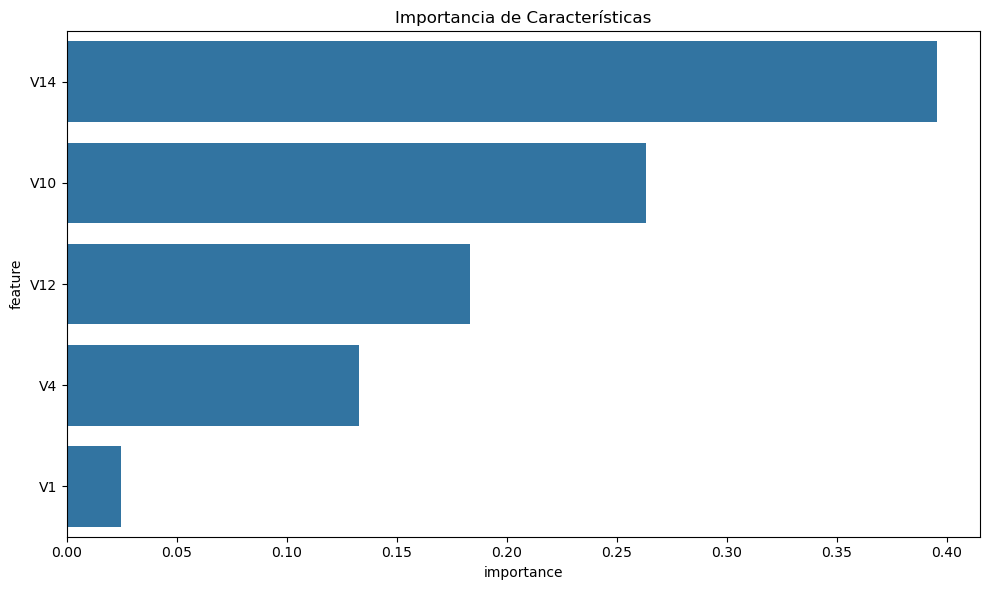

,feature,importance
0,V14,0.395427
1,V10,0.263605
3,V12,0.183181
2,V4,0.133142
4,V1,0.024644


In [15]:
plot_feature_importance(model= best_rf, X= X)

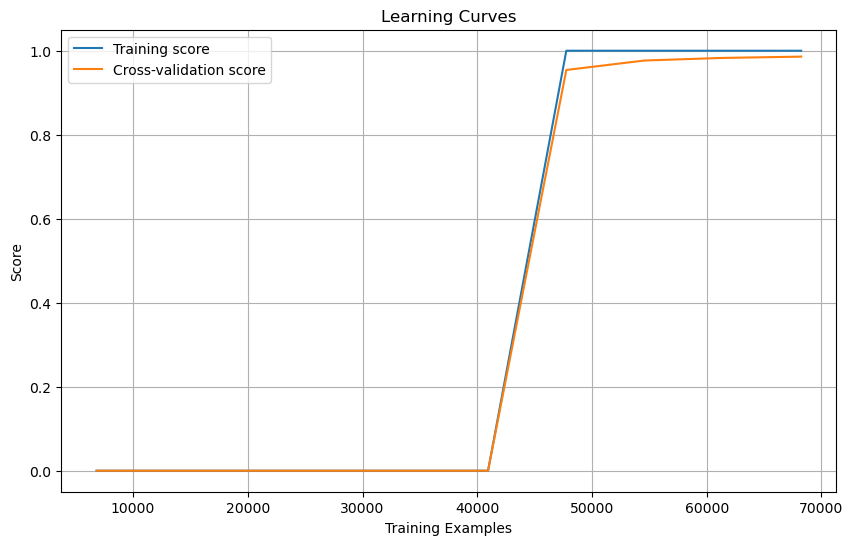

In [16]:
plot_learning_curves(model= best_rf, X= X, y= y)